In [6]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df = pd.read_csv("TSLA.csv")
print('Number of rows and columns', df.shape)
df.head(5)

Number of rows and columns (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [7]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:,1:2].values

In [8]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60,800):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [10]:
model  = Sequential()

model.add(LSTM(units = 50, return_sequences =True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss ='mean_squared_error')

model.fit(X_train,y_train,epochs = 100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 0s 10ms/step - loss: 0.1148
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0410
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0379
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0335
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0322
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 8/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 10/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 11/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 12/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0275
Epoch 13/100
24/24 [================

In [16]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])

    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [52]:
dataset_test.shape

(459, 1)

In [64]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price[0].shape
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(60, 1)

In [65]:
predicted_stock_price.shape

(459, 60, 1)

ValueError: x and y must have same first dimension, but have shapes (459,) and (60, 1)

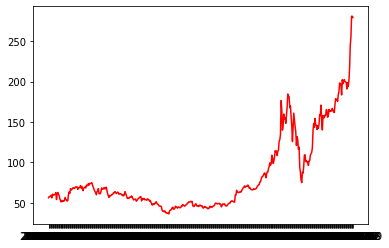

In [66]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()